In [10]:
import pandas as pd #for working with dataframes
import numpy as np #for linear algebra

In [11]:
import matplotlib.pyplot as plt #all for visualization
%matplotlib inline
import seaborn as sns

In [12]:
plt.style.use('fivethirtyeight')

In [13]:
path = r'C:\Users\Admin\Documents\Data\Data\Absenteeism_at_work.csv'

In [14]:
df = pd.read_csv(path,sep=';')
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [15]:
df.columns.str.replace('/',' per ').str.strip()

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average per day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [16]:
df.info() #no missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [18]:
df= df.drop(df.index[df['Month of absence'] == 0]) #those are probably wrong input

In [19]:
df.isna().any()

ID                                 False
Reason for absence                 False
Month of absence                   False
Day of the week                    False
Seasons                            False
Transportation expense             False
Distance from Residence to Work    False
Service time                       False
Age                                False
Work load Average/day              False
Hit target                         False
Disciplinary failure               False
Education                          False
Son                                False
Social drinker                     False
Social smoker                      False
Pet                                False
Weight                             False
Height                             False
Body mass index                    False
Absenteeism time in hours          False
dtype: bool

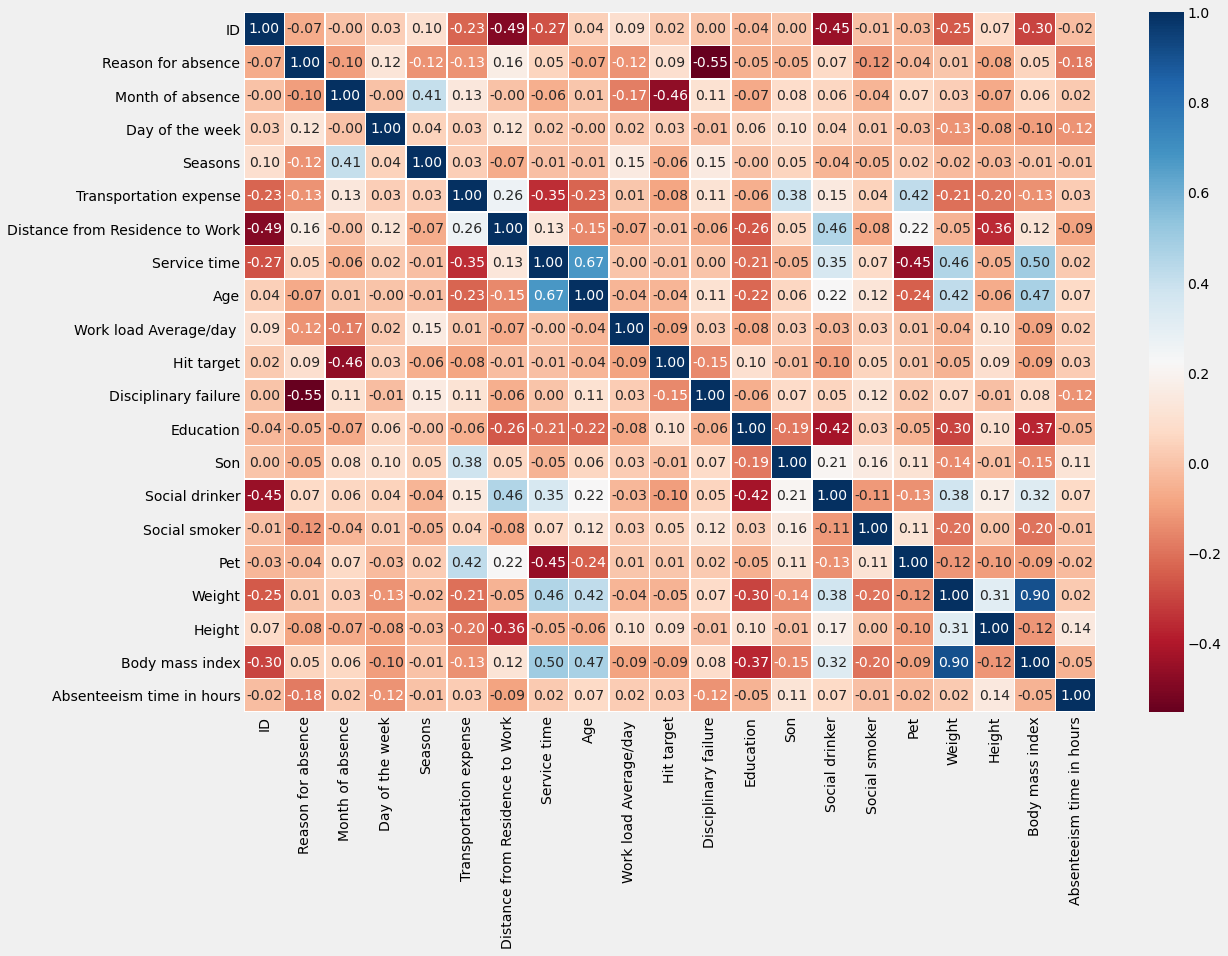

In [20]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),cmap='RdBu',annot=True,fmt='.2f',linewidths=.5)
plt.show() #no correlation between target variable and the others

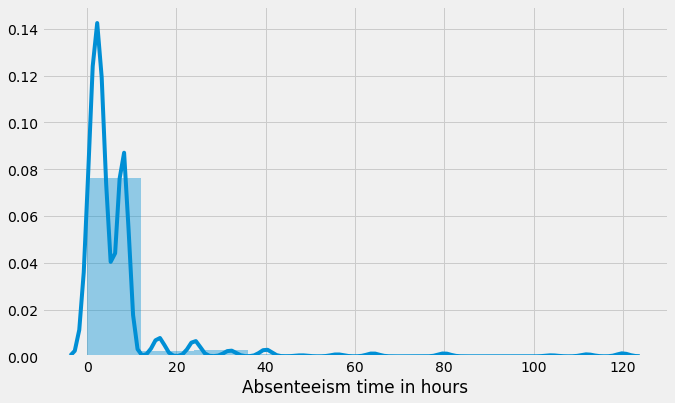

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['Absenteeism time in hours'], bins=10)
plt.show()

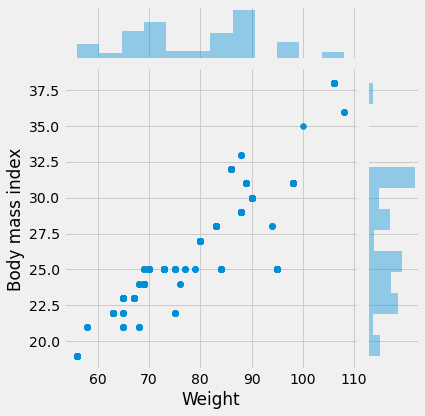

In [22]:
sns.jointplot(x='Weight', y='Body mass index', data=df)
plt.show()

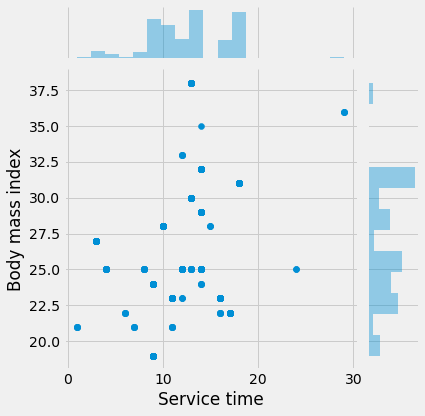

In [23]:
sns.jointplot(x='Service time', y='Body mass index', data=df)
plt.show()

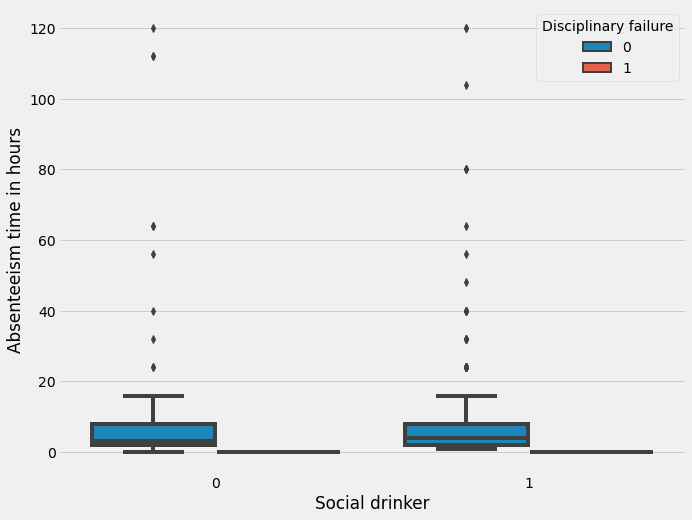

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Social drinker', y='Absenteeism time in hours', data=df, hue='Disciplinary failure')
plt.show()

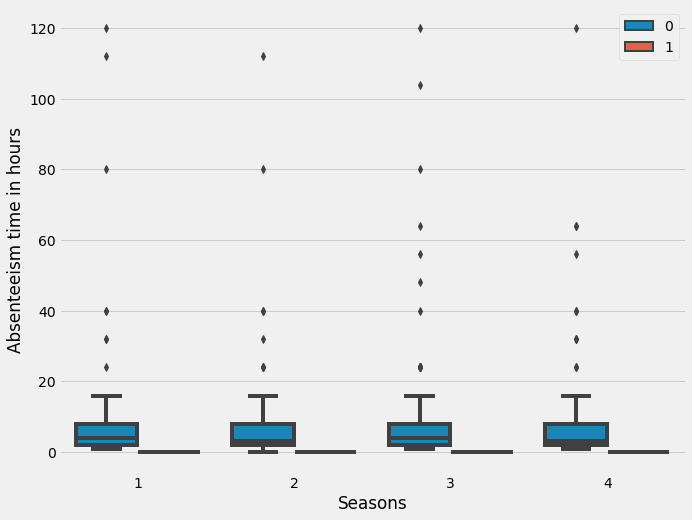

In [25]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Seasons', y='Absenteeism time in hours', data=df, hue='Disciplinary failure')
plt.legend(loc='upper right')
plt.show()

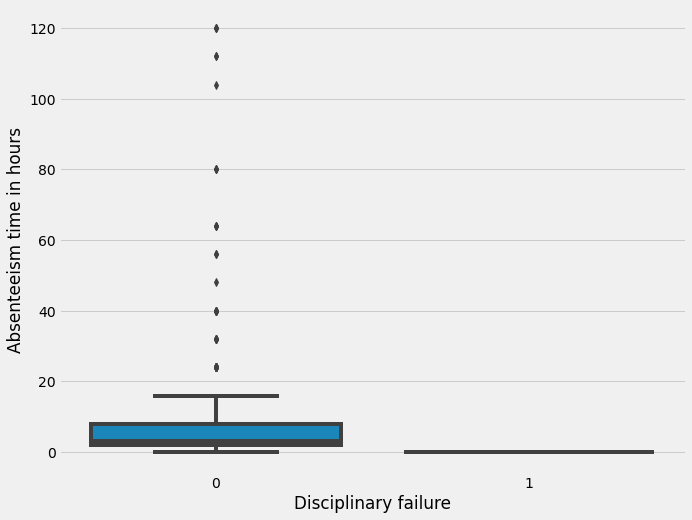

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Disciplinary failure', y='Absenteeism time in hours', data=df)
plt.show()

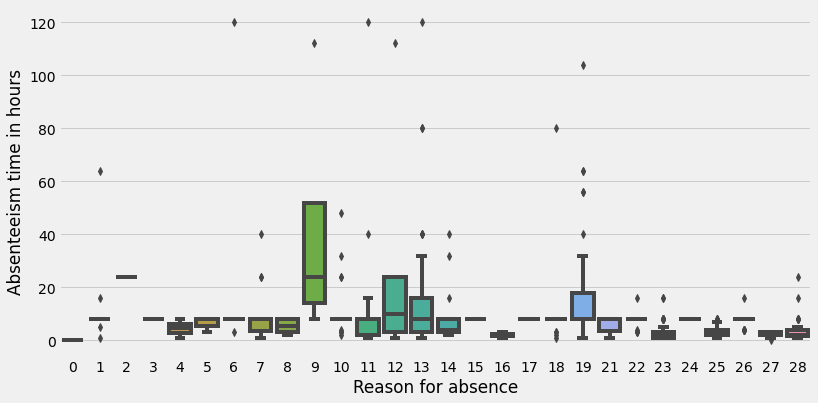

In [27]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Reason for absence', y='Absenteeism time in hours', data=df)
plt.show()

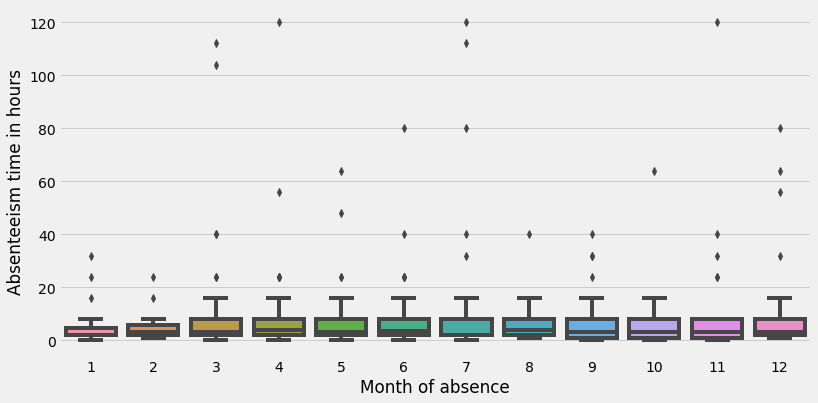

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Month of absence', y='Absenteeism time in hours', data=df)
plt.show()

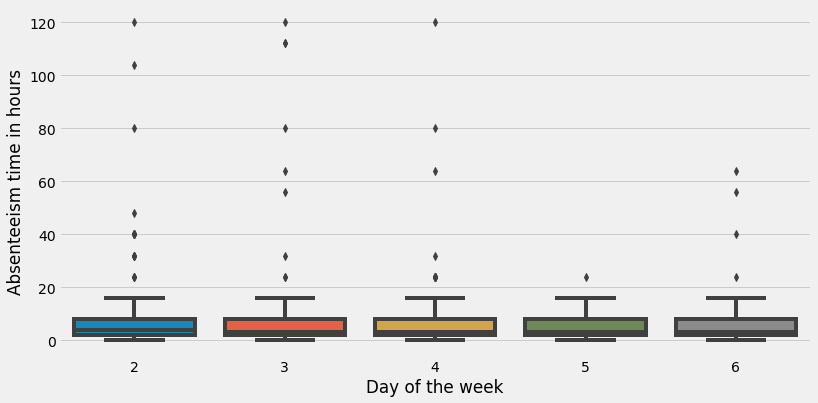

In [29]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Day of the week', y='Absenteeism time in hours', data=df)
plt.show()

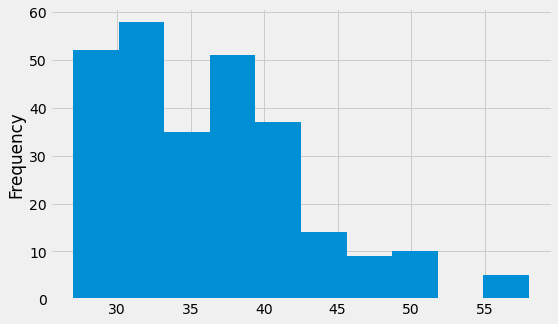

In [30]:
plt.figure(figsize=(8,5))
df[df['Absenteeism time in hours'] > 7]['Age'].plot(kind='hist')
plt.show()

In [31]:
df[df['Absenteeism time in hours'] > 7]['Age'].mean()

36.23616236162361

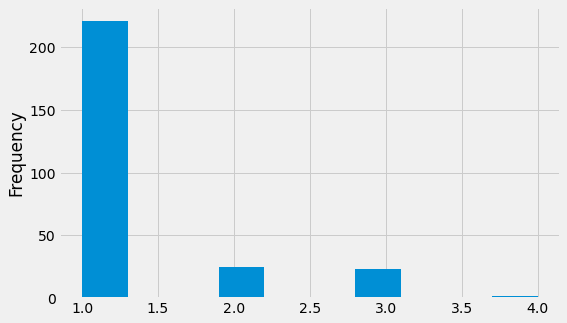

In [32]:
plt.figure(figsize=(8,5))
df[df['Absenteeism time in hours'] > 7]['Education'].plot(kind='hist')
plt.show()

In [33]:
byMonth = df.groupby('Month of absence')
byMonth['Absenteeism time in hours'].sum()

Month of absence
1     222
2     294
3     765
4     482
5     400
6     411
7     734
8     288
9     292
10    349
11    473
12    414
Name: Absenteeism time in hours, dtype: int64

In [34]:
byWeekday = df.groupby('Day of the week')
byWeekday['Absenteeism time in hours'].sum()

Day of the week
2    1489
3    1229
4    1115
5     553
6     738
Name: Absenteeism time in hours, dtype: int64

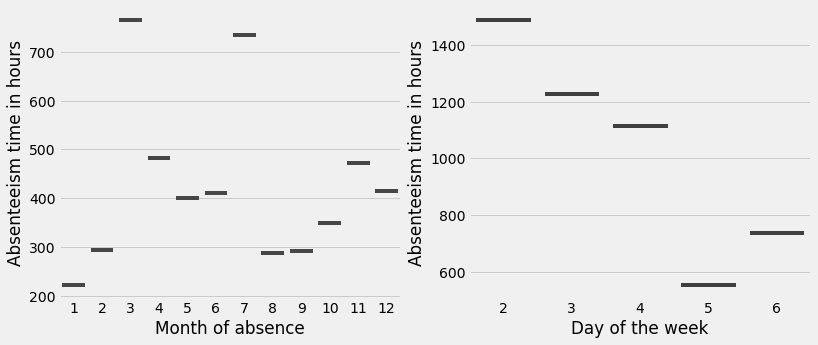

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=byMonth['Absenteeism time in hours'].sum().index,
            y=byMonth['Absenteeism time in hours'].sum())

plt.subplot(1,2,2)
sns.boxplot(x=byWeekday['Absenteeism time in hours'].sum().index,
            y=byWeekday['Absenteeism time in hours'].sum())
plt.show()

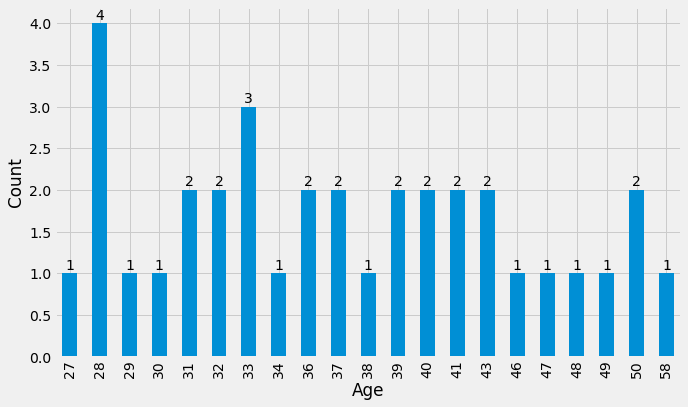

In [36]:
byAge = df.groupby(['Age']).agg({'ID':pd.Series.nunique})
ax = byAge.plot(kind='bar', figsize=(10,6), legend=False)
for i,v in enumerate(byAge.values):
    ax.text(i-.15, v+.05, s=v[0])
plt.ylabel('Count')
plt.show()

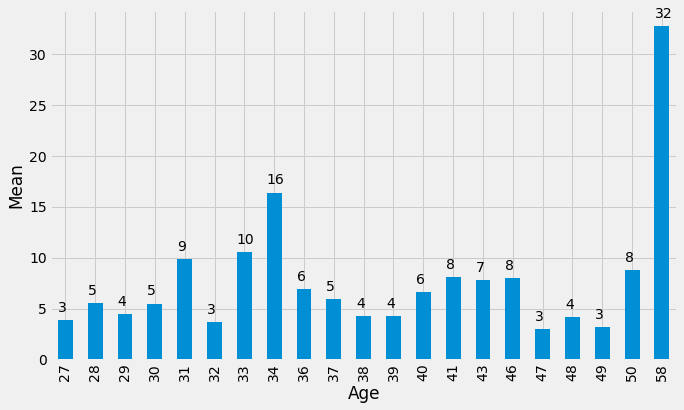

In [37]:
byAge_Abs = df.groupby(['Age'])['Absenteeism time in hours'].mean()
ax = byAge_Abs.plot(kind='bar', figsize=(10,6), legend=False)
for i,v in enumerate(byAge_Abs.values):
    ax.text(i-0.25, v+0.8, s=int(v))
plt.ylabel('Mean')
plt.show()

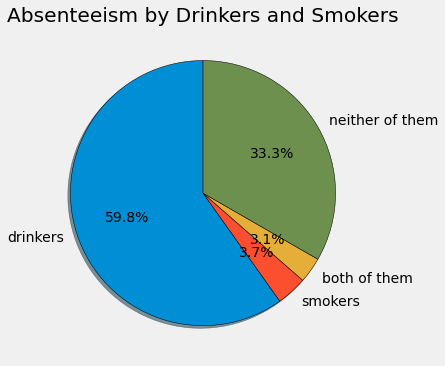

In [38]:
drinkers = df[(df['Social drinker'] == True) & (df['Social smoker'] == False)]['Absenteeism time in hours'].sum()
smokers = df[(df['Social drinker'] == False) & (df['Social smoker'] == True)]['Absenteeism time in hours'].sum()
drink_and_smoke = df[(df['Social drinker'] == True) & (df['Social smoker'] == True)]['Absenteeism time in hours'].sum()
not_drink_or_smoke = df[(df['Social drinker'] == False) & (df['Social smoker'] == False)]['Absenteeism time in hours'].sum()
slices = [drinkers, smokers, drink_and_smoke, not_drink_or_smoke]
labels = ['drinkers', 'smokers', 'both of them', 'neither of them']
plt.figure(figsize=(6,6))
plt.pie(slices, labels=labels, shadow=True,startangle=90, autopct='%1.1f%%',wedgeprops={'edgecolor': 'black'})
plt.title('Absenteeism by Drinkers and Smokers')
plt.tight_layout()
plt.show()

In [39]:
df.shape

(737, 21)

In [40]:
df = df.drop_duplicates(keep='first').reset_index()

In [41]:
df.shape

(703, 22)

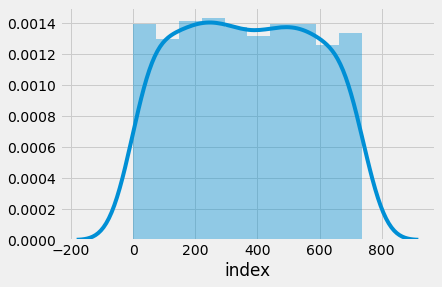

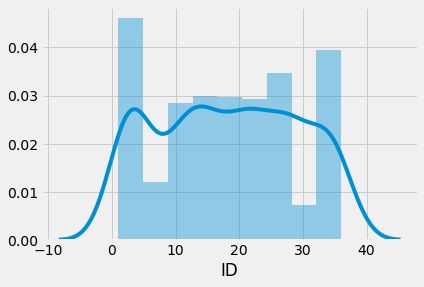

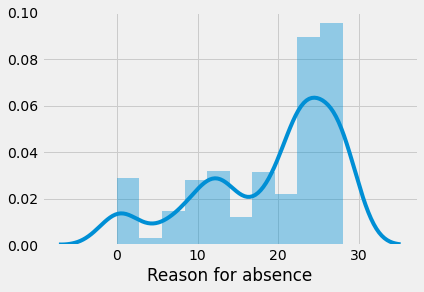

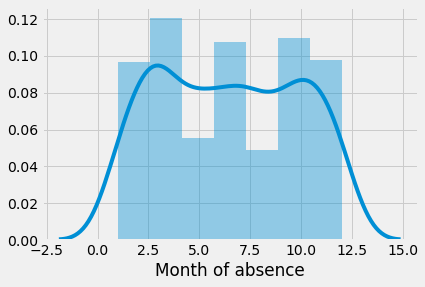

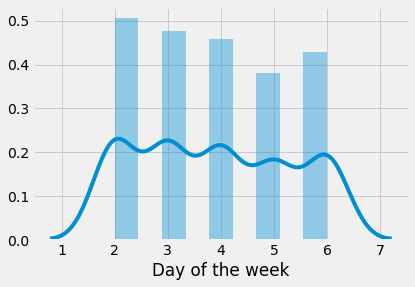

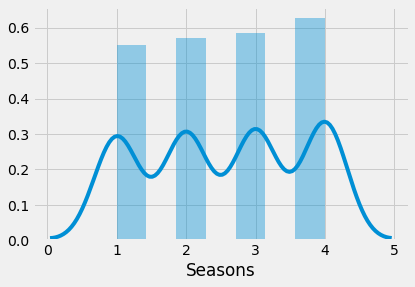

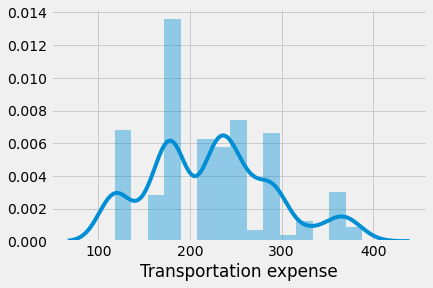

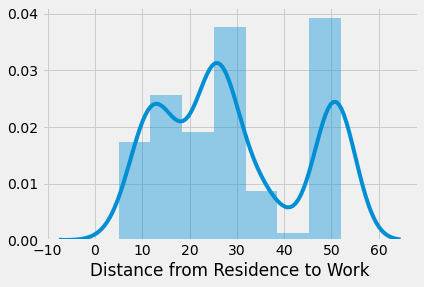

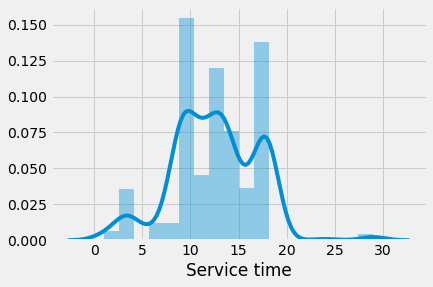

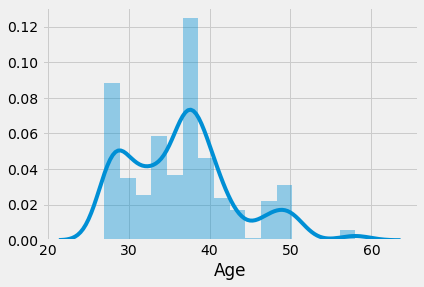

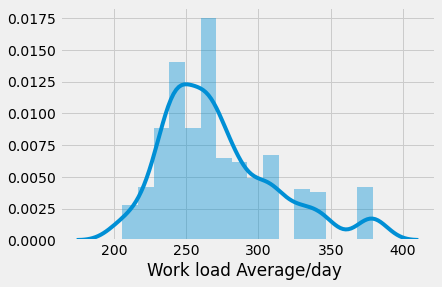

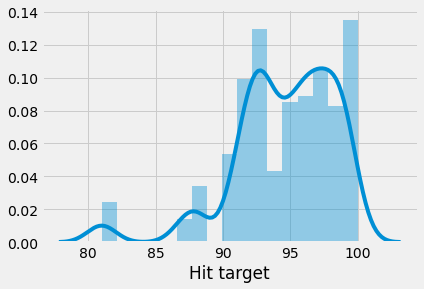

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


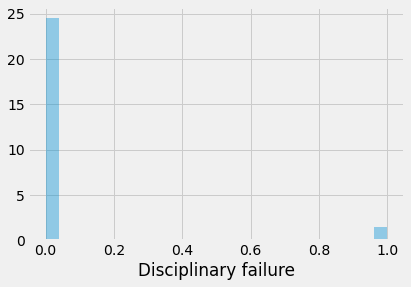

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


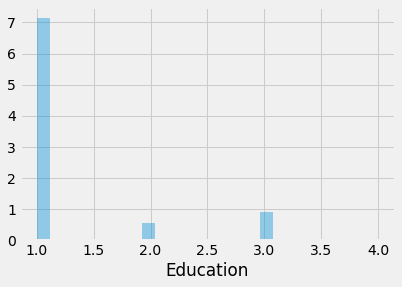

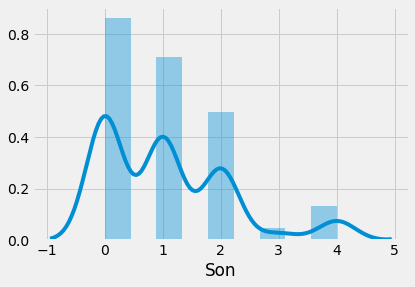

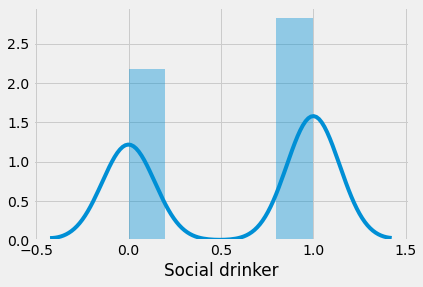

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


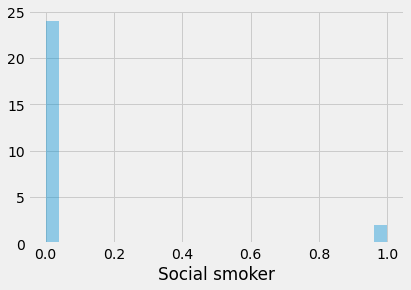

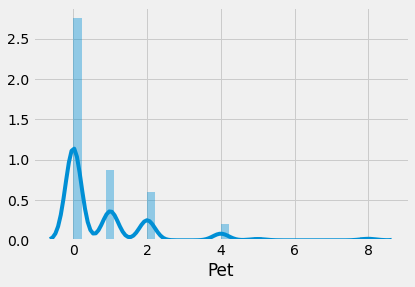

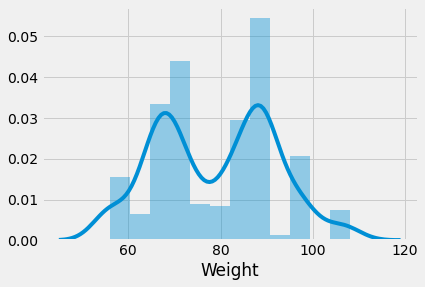

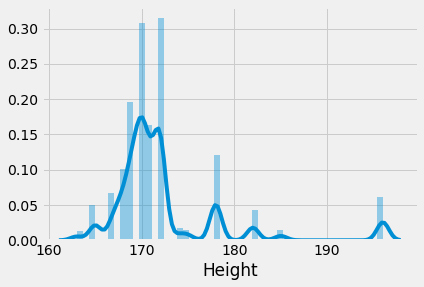

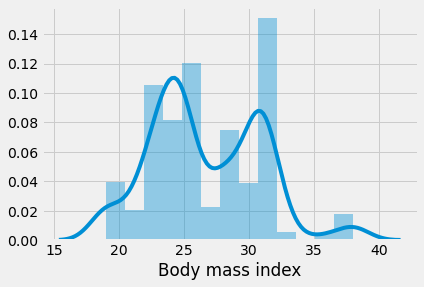

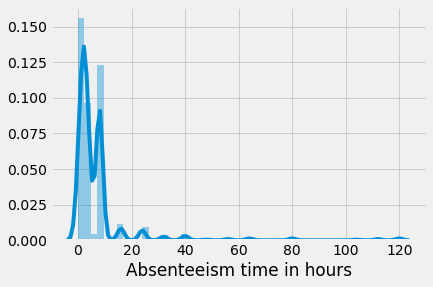

In [42]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

In [43]:
from sklearn.model_selection import train_test_split #train test split before standardizing

In [44]:
X = df.drop('Absenteeism time in hours', axis=1).values
y = df['Absenteeism time in hours'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
from sklearn.preprocessing import MinMaxScaler 

In [47]:
scaler = MinMaxScaler()

In [48]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.svm import SVR

In [50]:
svr = SVR(kernel='linear')

In [51]:
svr = svr.fit(X_train,y_train.ravel())

In [52]:
y_pred = svr.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, explained_variance_score

In [58]:
print('MSE:{}'.format(round(mean_squared_error(y_test,y_pred), ndigits=3)))
print('Explained variance score:{}'.format(round(explained_variance_score(y_test,y_pred), ndigits=3)))

MSE:417.584
Explained variance score:0.047
